<h1>                 TOPIC-Visualization of Migration Trends Using Passport Data     </h1>


<h2>  OBJECTIVE-Visualizing immigration/emigration flows by analyzing government-issued passport statistics</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h2>1.Reading dataset</h2>

In [2]:
dataset=pd.read_csv("Passport_Migration_Trends_Large.csv")
dataset.head()


,Year,Region,Passport_Type,Migration_Flow,Visa_Type,Application_Status,Apply,Issue,Net_Migration,Revenue_Generated,Processing_Time_Days,Country_Population,Application_ID,Is_Urgent,Officer_Assigned
0,2016,Central,Official,Emigration,Business,Rejected,4726.0,4628.0,268.0,539981.402924,19.8,8711634,APP00000,Yes,Officer C
1,2013,Central,Diplomatic,Immigration,Student,Rejected,NaN,NaN,32.0,NaN,-1.9,3414802,APP00001,Yes,Officer B
2,2022,East,Official,Immigration,Tourist,Rejected,6709.0,6594.0,15.0,671198.757896,14.5,1443031,APP00002,Yes,Officer A
3,2024,Central,Diplomatic,Emigration,Business,Approved,5825.0,5811.0,421.0,607176.834851,14.7,7444345,APP00003,Yes,Officer A
4,2020,West,Official,Emigration,Business,Rejected,6772.0,6658.0,3.0,982941.280606,12.9,3790373,APP00004,No,Officer B


<h2>2.Preprocessing</h2>

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  200 non-null    int64  
 1   Region                200 non-null    object 
 2   Passport_Type         200 non-null    object 
 3   Migration_Flow        200 non-null    object 
 4   Visa_Type             200 non-null    object 
 5   Application_Status    200 non-null    object 
 6   Apply                 190 non-null    float64
 7   Issue                 190 non-null    float64
 8   Net_Migration         190 non-null    float64
 9   Revenue_Generated     190 non-null    float64
 10  Processing_Time_Days  190 non-null    float64
 11  Country_Population    200 non-null    int64  
 12  Application_ID        200 non-null    object 
 13  Is_Urgent             200 non-null    object 
 14  Officer_Assigned      200 non-null    object 
dtypes: float64(5), int64(2)

<h5>there are 200 row and 15 columns </h5>

In [4]:
dataset.describe()

,Year,Apply,Issue,Net_Migration,Revenue_Generated,Processing_Time_Days,Country_Population
count,200.000000,190.000000,190.000000,190.000000,190.000000,190.000000,2.000000e+02
mean,2017.450000,5051.942105,4968.757895,317.105263,508417.368158,14.961579,5.571678e+06
std,4.320978,1095.880213,1093.890646,222.027191,180043.663763,4.875817,2.537864e+06
min,2010.000000,1432.000000,1276.000000,-191.000000,134953.102904,-1.900000,1.019675e+06
25%,2014.000000,4373.000000,4288.250000,178.000000,347014.916444,11.600000,3.445386e+06
50%,2017.500000,5085.500000,5012.500000,316.500000,508743.979598,14.950000,5.611917e+06
75%,2021.000000,5806.750000,5754.000000,477.750000,631392.518116,18.200000,7.774296e+06
max,2024.000000,8174.000000,8084.000000,919.000000,995295.491402,28.100000,9.976766e+06


<h2>3.lets check for unique catagories</h2>

In [5]:
print(dataset["Year"].unique())
print(dataset["Region"].unique())

[2016 2013 2022 2024 2020 2017 2014 2019 2012 2015 2011 2021 2023 2010
 2018]
['Central' 'East' 'West' 'South' 'North']


<h5>from here we get there is data between the year-2010 to 2024</h5>

<h2>4.lets check the null values</h2>

In [6]:
dataset.isnull().sum()

Year                     0
Region                   0
Passport_Type            0
Migration_Flow           0
Visa_Type                0
Application_Status       0
Apply                   10
Issue                   10
Net_Migration           10
Revenue_Generated       10
Processing_Time_Days    10
Country_Population       0
Application_ID           0
Is_Urgent                0
Officer_Assigned         0
dtype: int64

<h5>there are some columns which have some null values</h5>

<h2>5.Now we fill the null values</h2>

<h5> we will fill these null values column by mean ,median because all null columns are numerical columns</h5>

In [7]:
dataset["Apply"].fillna(dataset["Apply"].mean(),inplace=True)
dataset["Revenue_Generated"].fillna(dataset["Revenue_Generated"].mean(),inplace=True)
dataset["Net_Migration"].fillna(dataset["Net_Migration"].median(),inplace=True)
dataset["Issue"].fillna(dataset["Issue"].median(),inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1736\958833480.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Apply"].fillna(dataset["Apply"].mean(),inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1736\958833480.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

<h5> here Processing_Time_Days column has one negative value and day has never negative then we convert negative column into null value then it will be fill by mean

In [8]:
#conver negavtive value into null
dataset.loc[dataset["Processing_Time_Days"]<0 , "Processing_Time_Days"]=np.nan

In [9]:
# then fill these null value
fill_data=dataset["Processing_Time_Days"].mean()
dataset["Processing_Time_Days"].fillna(fill_data,inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1736\3213554184.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Processing_Time_Days"].fillna(fill_data,inplace=True)


<h3> Now all null values are filled</h3>

In [10]:
dataset.isnull().sum()

Year                    0
Region                  0
Passport_Type           0
Migration_Flow          0
Visa_Type               0
Application_Status      0
Apply                   0
Issue                   0
Net_Migration           0
Revenue_Generated       0
Processing_Time_Days    0
Country_Population      0
Application_ID          0
Is_Urgent               0
Officer_Assigned        0
dtype: int64

<h2>6.Visulizing the data</h2>

<h2><span style="color:blue">(i).. Region wise application </span</h2>

<h3>Which region gives more application ? </h3>

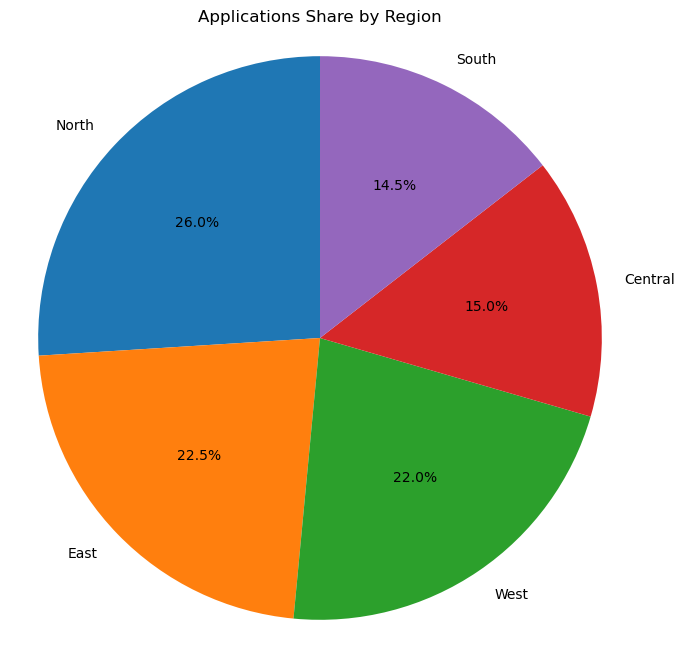

In [11]:
region_counts = dataset['Region'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Applications Share by Region")
plt.axis('equal')
plt.show()


<h3>. North region gives more application </h3>
<h3>. South has less application</h3>

<h2><span style="color:blue">(ii).. lets see applied and issued passport year wise </span</h2>

<h3>How total  num of application  passport  and  issued passport changing  yearwise?</h3>

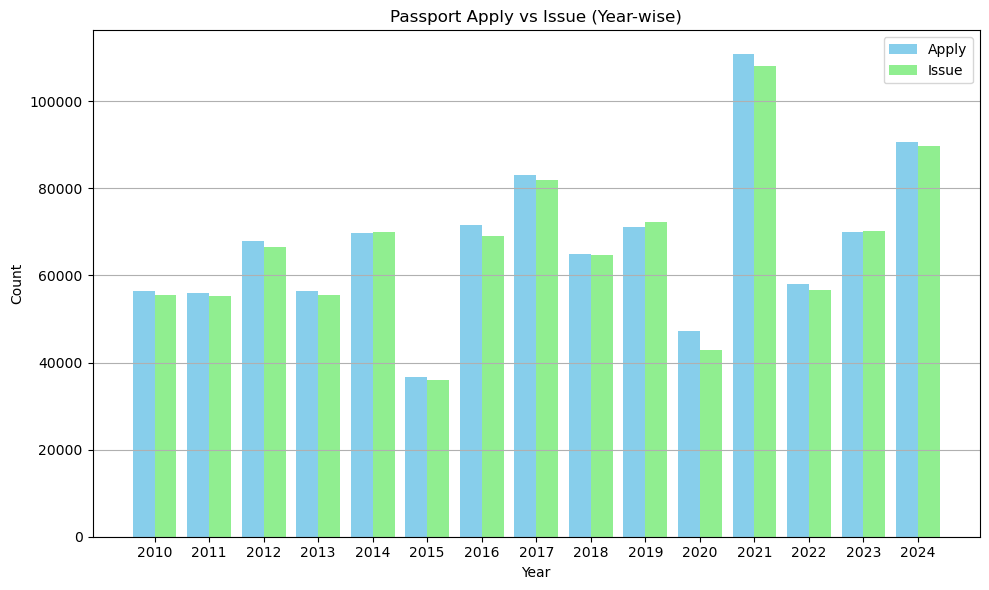

In [12]:
# Unique years
years = sorted(dataset['Year'].unique())
x = np.arange(len(years))#set the bar position

# Set figure size
plt.figure(figsize=(10,6))

# Bar chart
plt.bar(x - 0.2, dataset.groupby('Year')['Apply'].sum(), width=0.4, label='Apply', color='skyblue')
plt.bar(x + 0.2, dataset.groupby('Year')['Issue'].sum(), width=0.4, label='Issue', color='lightgreen')

# Labels 
plt.xticks(x, years)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Passport Apply vs Issue (Year-wise)")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()



<h3>Passport Application and Issuance Insights -</h3>
<h3>. In year 2021  highest number of people applied for passoprt</h3>
<h3>. In year 2014,2019 has more issued than application ,thats mean their last year passport issue is pending or some other reason</h3>
<h3>. In 2015 the lowest apply </h3>
<h3>. The higher number of issued passport is in year 2021</h3>

<h2><span style="color:blue">(IIi)..reagion wise migration flow </span></h2>

<h3> which region has more Emigration and Immigration?</h3>

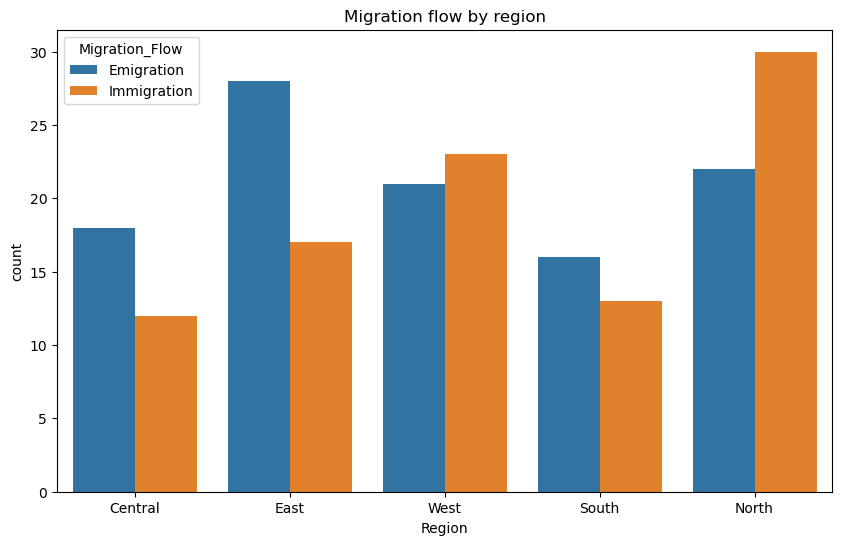

In [13]:
#here we using count plot
plt.figure(figsize=(10,6))
sns.countplot(x="Region",hue="Migration_Flow",data=dataset)
plt.title("Migration flow by region")
plt.xlabel("Region")
plt.ylabel("count")
plt.show()

<h3>Regional Immigration Insights -</h3>
<h3>. We get information that people loves to lives in north region..because there is highest imigration.</h3>
<h3>. West region is also good for living because there immigration count is more than its emigration count.</h3>
<h3>. Here we get that central reason is not perfect place for settle temporarily or permanenet.because immigration is low</h3>

<h2><span style="color:blue">(iv) Revenue generated per year</span></h2>

<h3> How much revenue generated in year between 2010 to 2024?</h3>

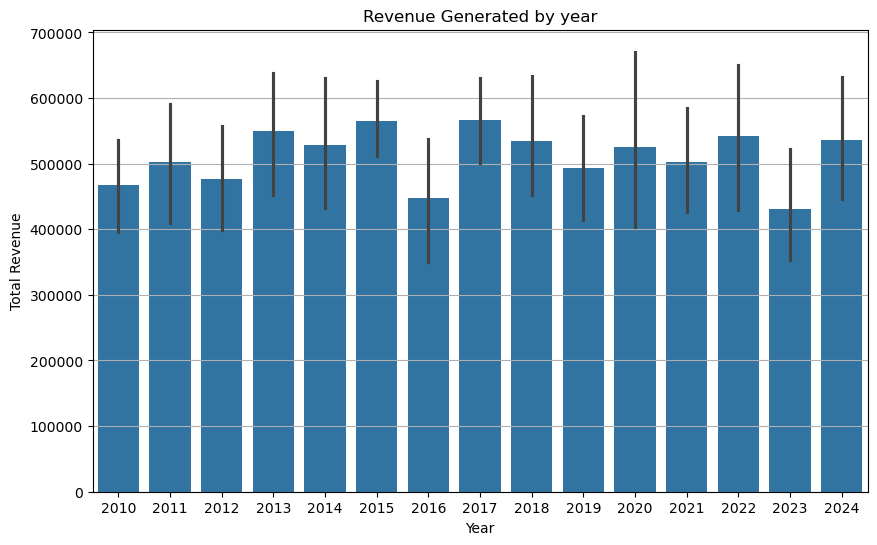

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x="Year", y="Revenue_Generated", data=dataset)
plt.title("Revenue Generated by year")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.grid(axis="y")
plt.show()

<h3>. The highest revenue generated in year 2015 and 2017</h3>
<h3>. The lowest revenue genrated in year 2023</h3>

<h2><span style="color:blue">(v)..passport type  preference per region </span></h2>

<h3> Which passoprt type generated from which region?</h3>

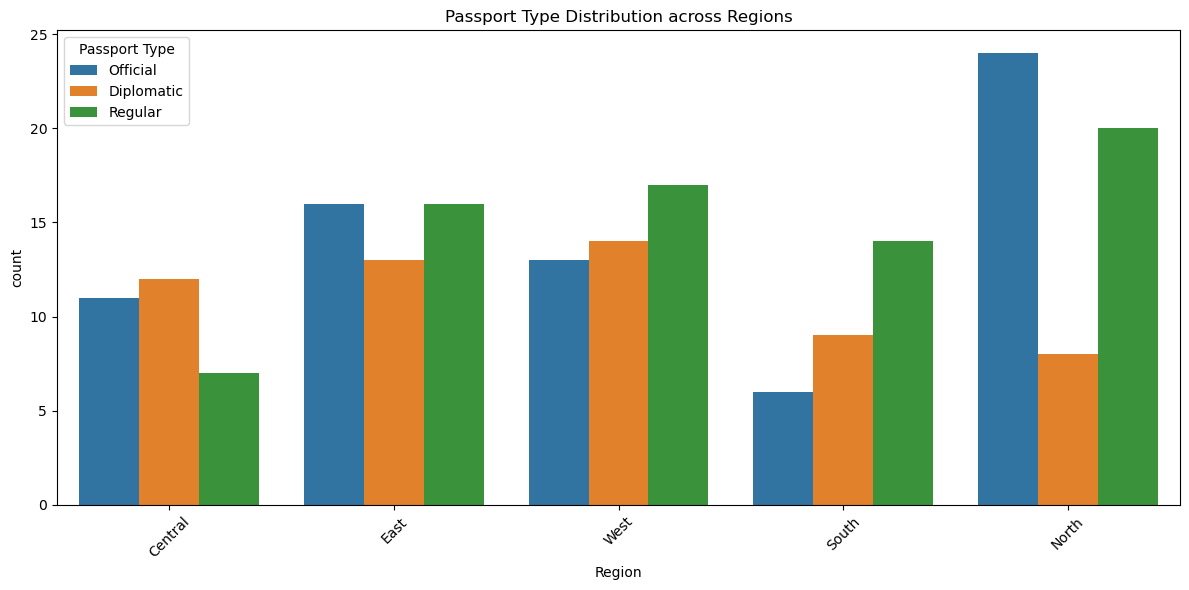

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(data=dataset, x='Region', hue='Passport_Type')
plt.title('Passport Type Distribution across Regions')
plt.xticks(rotation=45)
plt.legend(title='Passport Type',loc='upper left')
plt.tight_layout()
plt.show()


<h3>🧾 Regional Passport Application & Issuance Insights -</h3>
<h3>. More application comes from north region-more official passoprt generated in north region</h3>
<h3>. Diplomatic are less in north  and east region</h3>
<h3>. Central region has less num of regular passport type generated</h3>


<h2><span style="color:blue">(vi)..passport type taken average processing_time </span></h2>

<h3>How much days will taken by diffrent-diffrent passport type for issue?</h3>

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1736\3397615431.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Avg_time,x='Passport_Type',y='Processing_Time_Days',palette='Set1')


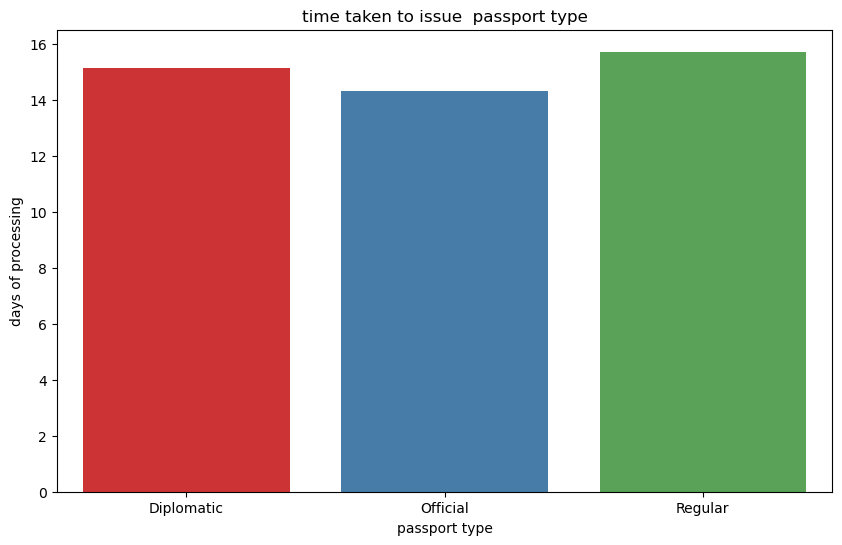

In [16]:
Avg_time=dataset.groupby('Passport_Type')['Processing_Time_Days'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=Avg_time,x='Passport_Type',y='Processing_Time_Days',palette='Set1')
plt.xlabel("passport type")
plt.ylabel("days of processing")
plt.title("time taken to issue  passport type")
plt.show()


<h3>. Regular passort taken more average days than other two passport</h3>
<h3>. Official passport has taken less days for issue</h3>

<h2><span style="color:blue">(vi) Urgency Impact on Application Success </span></h2>

<h3> lets check application is more approved or reject</h3>

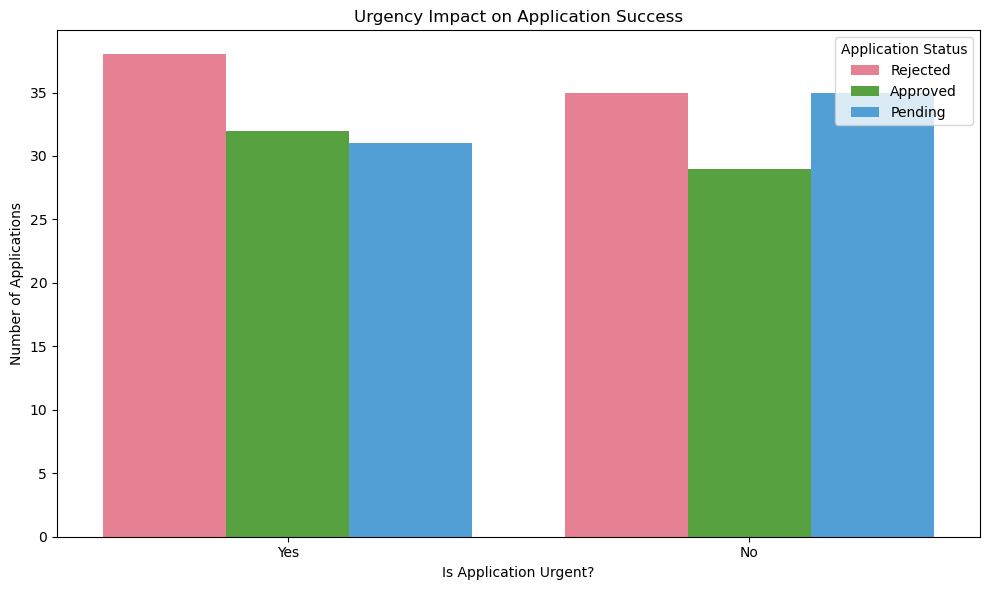

In [17]:
#making count plot
plt.figure(figsize=(10,6))
sns.countplot(x="Is_Urgent",hue="Application_Status",data=dataset,palette='husl')
plt.title('Urgency Impact on Application Success')
plt.xlabel('Is Application Urgent?')
plt.ylabel('Number of Applications')
plt.legend(title='Application Status')
plt.tight_layout()
plt.show()

<h3>❗ Application Status Summary-</h3>
<h3>. Rejection rate is higher for both types , but slightly higher for
    urgent application</h3>
<h3>. In non urgent  pending status is high- that make sense , for nonurgent  process
    is sowly</h3>

<h2><span style="color:blue">(v)..Visa trends in region </span></h2>


<h3> 🌐 Migration by Visa Type</h3> 
<h3>visa type distribution in diffrent region</h3>


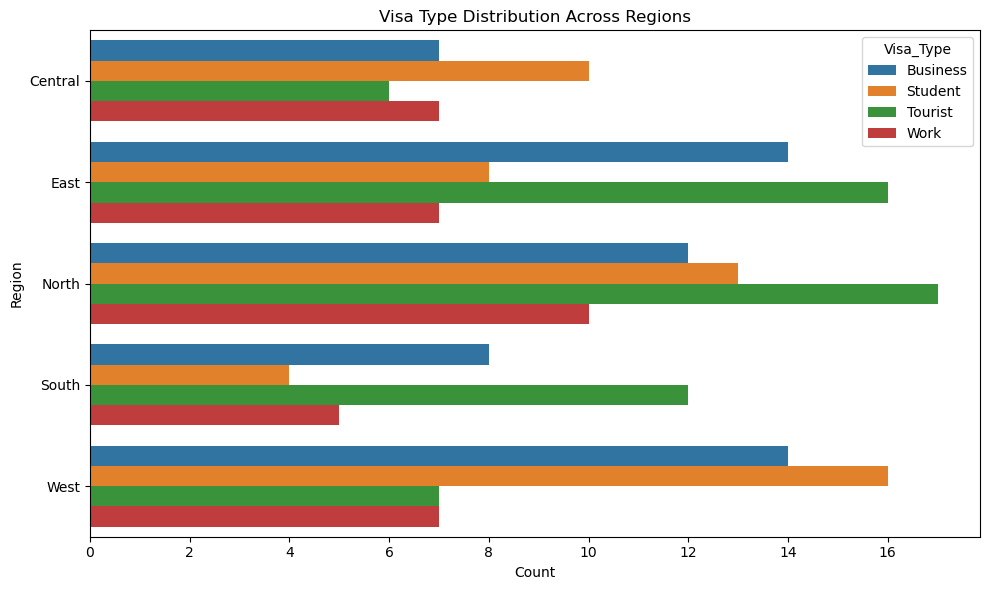

In [18]:
grouped = dataset.groupby(['Visa_Type', 'Region']).size().reset_index(name='Count')
plt.figure(figsize=(10,6))
sns.barplot(data=grouped, y="Region", x="Count", hue="Visa_Type")
plt.title("Visa Type Distribution Across Regions")
plt.tight_layout()
plt.show()





<h3>. tourist-north</h3>
<h3>. student -west</h3>
<h3>. buisness- east and and west both</h3>
<h3>. work- north</h3>

<h2>People emigrate and immigrate in different regions in different visa types?</h2>

In [19]:
print(dataset["Visa_Type"].unique())

['Business' 'Student' 'Tourist' 'Work']


In [20]:
# Example group: Total people per Region, Visa_Type, and Flow
grouped = dataset.groupby(['Region', 'Visa_Type', 'Migration_Flow'])['Issue'].sum().reset_index()

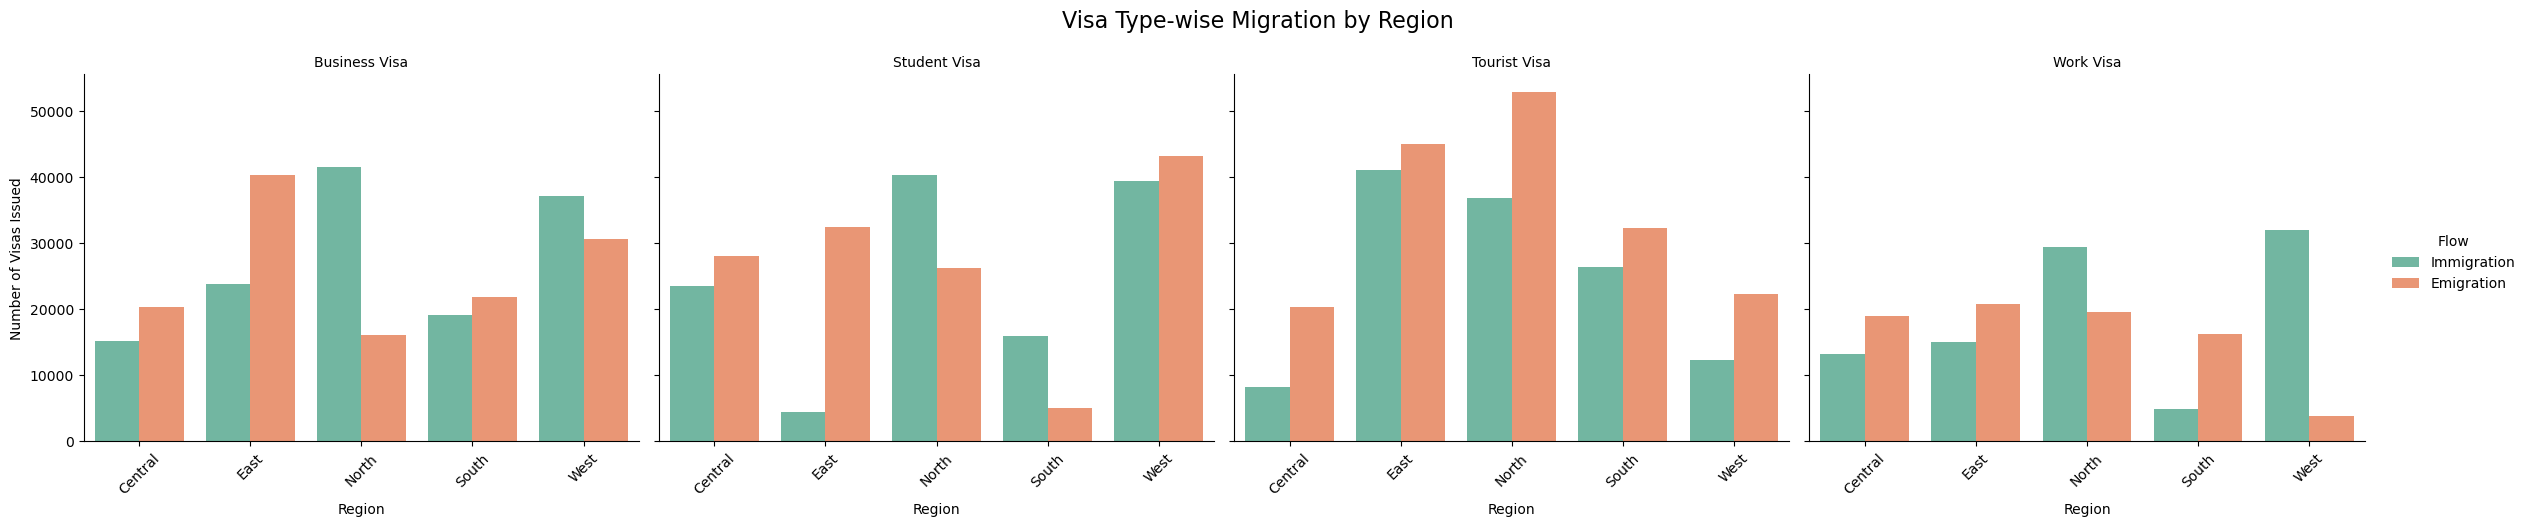

In [21]:
g = sns.catplot(data=grouped,x='Region',y='Issue',hue='Migration_Flow',col='Visa_Type',kind='bar'
    ,palette='Set2',
    height=5,
    aspect=1.2,
    hue_order=['Immigration', 'Emigration'])

g.set_titles("{col_name} Visa")
g.fig.suptitle("Visa Type-wise Migration by Region", fontsize=16)
g.set_axis_labels("Region", "Number of Visas Issued")
g.set_xticklabels(rotation=45)
g._legend.set_title("Flow")
plt.subplots_adjust(top=0.85)
plt.show()

<h3> 🛂 Visa Type Insights by Region</h3>
<h3>. Business visa holders mostly arrive in the North and West regions.</h3>
<h3>. Student visa trends show:<h3>
<h3>Students go abroad from the West</h3>
<h3>Students arrive in both North and West regions</h3>
<h3>. The West region has a strong education culture, as students both come in and go out for studies</h3>
<h3>. Tourist visa entries are higher in the North and East regions.</h3>
<h3>. Work visa holders mostly arrive in the West region, indicating strong employment opportunities.</h3>

<h2><span style="color:blue">(vi) Type of urgent visa issued in which year</span></h2>

<h3>Which type of urgent visa issued in which year?</h3>

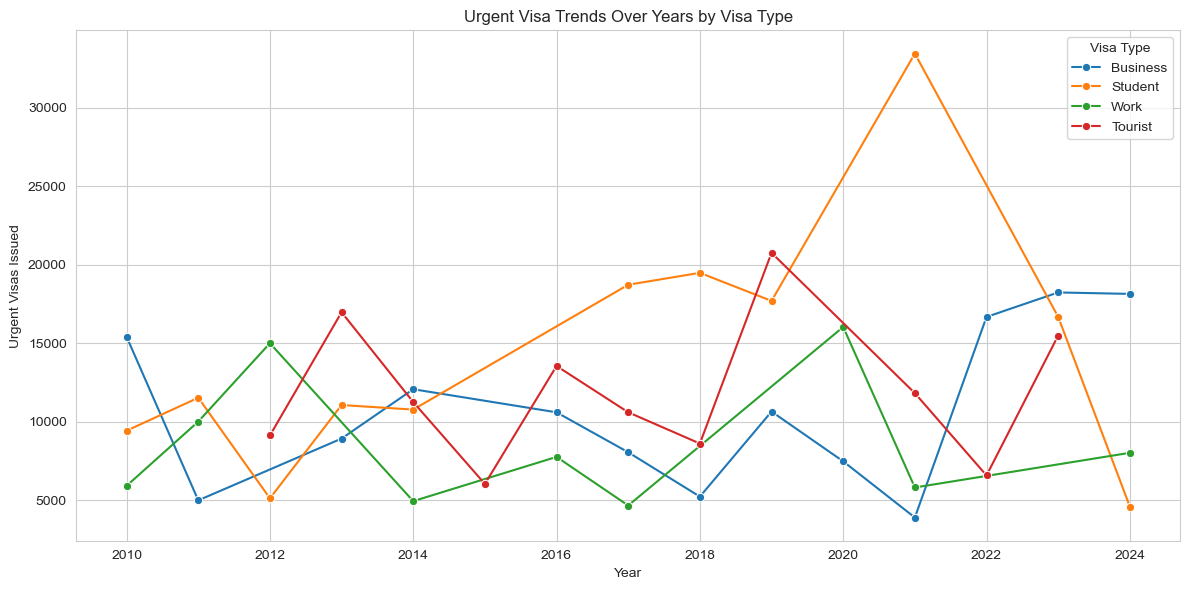

In [22]:
# Filter only urgent visas
urgent_visas = dataset[dataset['Is_Urgent'] == 'Yes']

# Group by Year and Visa_Type
urgent_trend = urgent_visas.groupby(['Year', 'Visa_Type'])['Issue'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.lineplot(data=urgent_trend,x='Year',y='Issue',hue='Visa_Type',marker='o',palette='tab10')

plt.title("Urgent Visa Trends Over Years by Visa Type")
plt.xlabel("Year")
plt.ylabel("Urgent Visas Issued")
plt.legend(title='Visa Type')
plt.grid(True)
plt.tight_layout()
plt.show()

## 📈 Visa Trends Summary
<h3>. student visa is most issues as urgent visa</h3>
<h3>. student visa highly rise in 2019 to 2023</h3>
<h3>. tourist visa highly incresed between 2018 to 2022</h3>
<h3>. less issued urgent visa is buisness visa</h3>

<h2><span style="color:blue">(vii)..Making relation among all columns</span></h2>

<h3> how all columns related to each other?</h3>

In [23]:
#find unique values of all object column
print(dataset['Is_Urgent'].unique())
print(dataset['Region'].unique())
print(dataset['Passport_Type'].unique())
print(dataset['Migration_Flow'].unique())
print(dataset['Visa_Type'].unique())
print(dataset['Application_Status'].unique())
print(dataset['Officer_Assigned'].unique())

['Yes' 'No']
['Central' 'East' 'West' 'South' 'North']
['Official' 'Diplomatic' 'Regular']
['Emigration' 'Immigration']
['Business' 'Student' 'Tourist' 'Work']
['Rejected' 'Approved' 'Pending']
['Officer C' 'Officer B' 'Officer A']


In [24]:
#replace this unique values bue integer
dataset['Is_Urgent'] = dataset['Is_Urgent'].replace({'Yes': 1, 'No':0})
dataset['Region'] = dataset['Region'].replace({'Central':0, 'East':1, 'West':2, 'South':3, 'North':4})
dataset['Passport_Type'] = dataset['Passport_Type'].replace({'Official':0,'Diplomatic':1, 'Regular':2})
dataset['Migration_Flow'] = dataset['Migration_Flow'].replace({'Emigration':0, 'Immigration':1})
dataset['Visa_Type'] = dataset['Visa_Type'].replace({'Business':0, 'Student':1, 'Tourist':2, 'Work':3})
dataset['Application_Status'] = dataset['Application_Status'].replace({'Rejected':0, 'Approved':1, 'Pending':2})
dataset['Officer_Assigned'] = dataset['Officer_Assigned'].replace({'Officer C':0, 'Officer B':1, 'Officer A':2})

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1736\3625323429.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Is_Urgent'] = dataset['Is_Urgent'].replace({'Yes': 1, 'No':0})
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1736\3625323429.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Region'] = dataset['Region'].replace({'Central':0, 'East':1, 'West':2, 'South':3, 'North':4})
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1736\3625323429.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will

In [25]:
data_corr=dataset.corr(numeric_only=True)

Text(0.5, 1.0, 'correlation of columns')

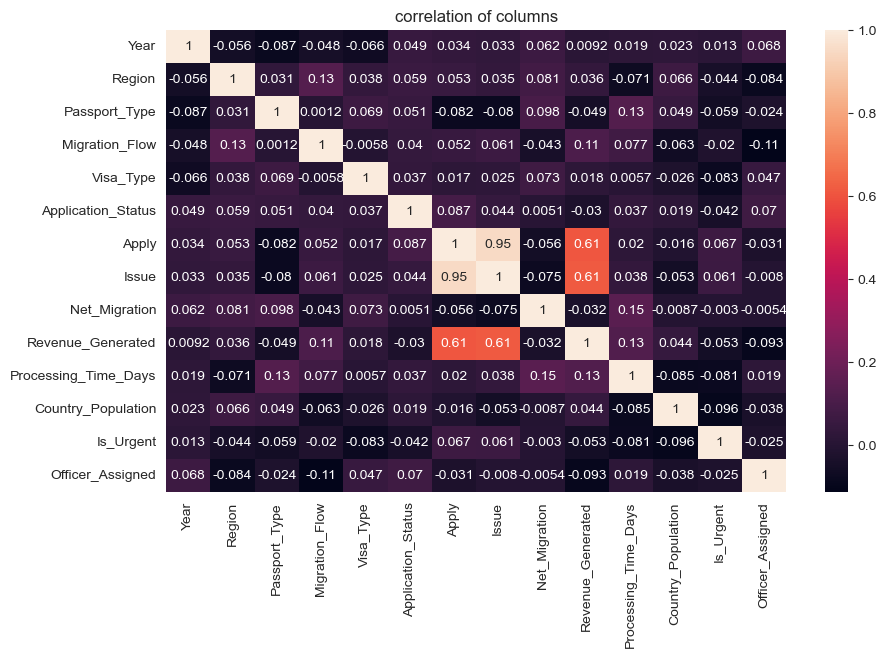

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(data_corr, annot=True, )
plt.title("correlation of columns")

<h3>. Apply and issue are highly dependend each other</h3>
<h3>. Apply and issue are highly imapct on revenue</h3>
<h3>. when processing time days increses then revenue increases</h3>


<h1>Summary</h1>

## 🔗 Key Relationships Between Columns

- **Apply** and **Issue** counts are **strongly dependent** on each other.
- Both **Apply** and **Issue** have a **significant impact on Revenue**.
- As **Processing Time (in days)** increases, **Revenue also tends to increase**.


###  1. Region-wise Passport Applications

#### 
- The **North region** stands out with the **highest share of passport applications**, reflecting a dense or mobile population with higher international travel or migration intent.
- The **South region** contributes the **least number of applications**, possibly indicating lower outbound migration or better regional retention.


---

### 2. Year-wise Applications vs Issued Passports


- **2021** witnessed the **peak in both applications and issued passports**, possibly due to **easing of COVID-19 restrictions** or **pent-up migration demand**.
- **Anomalies in 2014 and 2019**: These years had **more passports issued than applied**.

- **2015** had the **lowest application count**, potentially reflecting **socio-political or global travel constraints** that year.


---
### 3. Region-wise Migration Flow (Immigration vs Emigration)

- The **North region** shows the **highest immigration**, signaling **strong economic or lifestyle attraction**, making it a **preferred destination** within the country.
- The **West region** also reflects **net positive migration**, with **immigration exceeding emigration**, suggesting **balanced development and livability**.
- In contrast, the **Central region** experiences **higher emigration**, possibly due to **fewer job opportunities**, **education access**, or **infrastructure issues**.

---

###  4. Revenue Generated by Year


- **Revenue generation correlates strongly** with the **number of applications per year**.
- **Spikes in revenue** in high-application years like **2021** align with **increased demand for international travel or relocation**..

---

## 5. Visa Type-Based Migration Insights
---
###  Business Visa Trends
- Majority of **business visa holders come into the North and West regions**.
- Indicates strong **commercial hubs and business ecosystems** in these areas.

---

####  Student Visa Trends
- Students **emigrate from the West region** for education abroad.
- Simultaneously, **students immigrate to both North and West regions**.
- This reflects a **healthy education ecosystem** in the West, making it both a source and destination for learners.


---

#### Tourist Visa Trends
- **High influx of tourists** in the **North and East regions**.
- Could be due to **natural, cultural, or heritage attractions** in these zones.

---

#### Work Visa Trends
- The **West region attracts the most work visa holders**.
- Signifies **better employment opportunities, industrial development, and economic potential** in the region.

---

##  Observations on Urgent Visa Issuance

- **Student visa** is the most issued **urgent visa** overall.
- Student visa issuance **rose sharply from 2019 to 2023**.
- **Tourist visa** issuance **increased significantly between 2018 and 2022**.
- **Business visa** had the **lowest number of urgent visas issued** across all types.



<h2><span style="color:blue">model buildind: Using Linear Regression</spanmodel buildind: Using Liniear Regression

<h3>select algorithm</h3>

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score
from sklearn.model_selection import train_test_split

<h2>feature selection</h2>

In [ ]:
dataset.head()

In [51]:
x=dataset[["Apply","Issue", "Application_Status"]]
type(x)

pandas.core.frame.DataFrame

In [52]:
y=dataset["Revenue_Generated"]

<h2>data validation</h2>

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=70)

<h2>model_preparation</h2>

In [81]:
model_lr= LinearRegression()

<h2>model_fitting
</h2>

In [82]:
model_lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


<h2> model evolution by prediction</h2>

In [83]:
y_pred=model_lr.predict(x_test)

In [84]:
r2=r2_score(y_test,y_pred)
r2*100

38.87842613452164

<h4> here accuracy is very less then we applioed </h4>

<h2><span style="color:blue">model buildind: Using Logistic Regression</span></h2>

<h2>select algorithm</h2>

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split

<h2>feature selection</h2>

In [126]:
x= dataset[[ "Apply","Issue","Processing_Time_Days"]]
type(x)

pandas.core.frame.DataFrame

In [127]:
y=dataset["Is_Urgent"]

<h2>data validation</h2>

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=39)

<h2>model preparation</h2>

In [129]:
model_ls=LogisticRegression(max_iter=10000)

<h2>model fitting</h2>

In [130]:
model_ls.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


<h2>model evolution by prediction</h2>

In [131]:
y_predict=model_ls.predict(x_test)

In [132]:
accuracy=accuracy_score(y_test,y_predict)
print( "accuracy=" ,accuracy*100)

accuracy= 58.333333333333336


In [133]:
conf_matrix=confusion_matrix(y_test,y_predict)
print("\nconfusion matrix-\n",conf_matrix)


confusion matrix-
 [[12 21]
 [ 4 23]]


In [134]:
class_report=classification_report(y_test,y_predict)
print(" \nclassification_report-\n",class_report)

 
classification_report-
               precision    recall  f1-score   support

           0       0.75      0.36      0.49        33
           1       0.52      0.85      0.65        27

    accuracy                           0.58        60
   macro avg       0.64      0.61      0.57        60
weighted avg       0.65      0.58      0.56        60



<h2>user prediction from model</h2>

In [136]:
user_input={
    "Apply":[float(input("enter appllication number"))],
    "Issue":[float(input("enter issue number"))],
    "Processing_Time_Days":[float(input("enter processing days"))]
}
user_dataset=pd.DataFrame(user_input)

enter appllication number 4726.0
enter issue number 4628.0
enter processing days 19.8


In [137]:
pred_user=model_ls.predict(user_dataset)
print("revenue generated",pred_user)

revenue generated [0]
